In [ ]:
print('Группа: 20БИ-3')
print('ФИО: Вербитский Матвей Максимович')
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Группа: 20БИ-3
ФИО: Вербитский Матвей Максимович
Wed Mar  3 23:11:31 MSK 2021


In [3]:
from google.colab import drive
drive.mount('/content/drive/')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive'))

Mounted at /content/drive/
/content
['.config', 'drive', 'adc.json', 'sample_data']
['.file-revisions-by-id', '.shortcut-targets-by-id', 'MyDrive', '.Trash']
['Camtasia', 'Untitled document (26).gdoc', 'Untitled document (25).gdoc', 'priem1920.rar', 'Untitled document (24).gdoc', 'Знаки препинания при обращении, пояснении, дополнении и уточнении.gslides', 'Для собрания.gslides', 'Для собрания.pptx', 'Untitled spreadsheet (11).gsheet', 'Заявка.gdoc', 'Untitled document (23).gdoc', 'Anketa_Na_Regionalnyi_774_Etap_Vsosh.gdoc', 'Anketa_Na_Regionalnyi_774_Etap_Vsosh.docx', 'Untitled document (22).gdoc', 'Untitled document (21).gdoc', 'Untitled document (20).gdoc', 'Untitled document (19).gdoc', 'Untitled document (18).gdoc', 'Untitled document (17).gdoc', 'Untitled document (16).gdoc', 'Untitled spreadsheet (10).gsheet', 'p9zZTsF_8Pw.jpg', 'Z5NzQkZA5z8.jpg', 'sTbXclI6C_w.jpg', 'D1K_IURw9zg.jpg', 'Untitled document (15).gdoc', 'Untitled document (14).gdoc', 'Untitled document (13).gdoc', 'Па

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 16484
-rw------- 1 root 2043997 Mar 10 18:09  70CEDE9A-4777-4EDB-A175-E5406A62911B.jpeg
-rw------- 1 root   38400 Oct 29 13:48 '72,1 (1).xls'
-rw------- 1 root   38400 Oct 29 15:29  72,1.xls
-rw------- 1 root   43008 Oct 29 13:51 '72  2019 (1).xls'
-rw------- 1 root   43008 Oct 29 13:50 '72  2019 (2).xls'
-rw------- 1 root   43008 Oct 29 15:51 '72  2019.xls'
-rw------- 1 root    7300 Jan  7  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.docx
-rw------- 1 root     151 Jan  3  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.gdoc
-rw------- 1 root 2043997 Mar 10 18:12  B1E0DA3D-1909-4F72-88FD-E8961850AF2F.jpeg
-rw------- 1 root     151 Nov 21 09:04 'barchart1 verbitsky.gdoc'
-rw------- 1 root     151 Feb 11 00:38 'bar chart dasha smirnova the best.gdoc'
-rw------- 1 root     151 Nov 20 21:31 'bar chart.gdoc'
drwx------ 2 root    4096 Nov  4  2016  Camtasia/
-rw------- 1 root    8656 

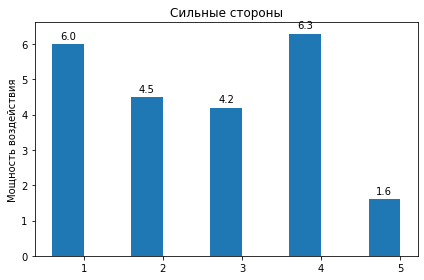

1 - Особая технология приготовления блюд
2 - Работает известный шеф-повар
3 - Руководство разработало эффективный план развития и стремится его исполнить
4 - В ресторане работают вежливые официанты, отлично знающие меню
5 - Компетентные сотрудники и менеджмент ресторана


In [4]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/restik.gsheet')
table = gs.open_by_key('1xfLXwP0XdgeExdyYHMYrpFK--zujy8xTm-nyxRKIsu8')
worksheet = table.worksheet('Strengths')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
strengths_sum = sum(power)
print('Суммарная сила сильный сторон:', strengths_sum)
worksheet.update('F2', strengths_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Сильные стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 16484
-rw------- 1 root 2043997 Mar 10 18:09  70CEDE9A-4777-4EDB-A175-E5406A62911B.jpeg
-rw------- 1 root   38400 Oct 29 13:48 '72,1 (1).xls'
-rw------- 1 root   38400 Oct 29 15:29  72,1.xls
-rw------- 1 root   43008 Oct 29 13:51 '72  2019 (1).xls'
-rw------- 1 root   43008 Oct 29 13:50 '72  2019 (2).xls'
-rw------- 1 root   43008 Oct 29 15:51 '72  2019.xls'
-rw------- 1 root    7300 Jan  7  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.docx
-rw------- 1 root     151 Jan  3  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.gdoc
-rw------- 1 root 2043997 Mar 10 18:12  B1E0DA3D-1909-4F72-88FD-E8961850AF2F.jpeg
-rw------- 1 root     151 Nov 21 09:04 'barchart1 verbitsky.gdoc'
-rw------- 1 root     151 Feb 11 00:38 'bar chart dasha smirnova the best.gdoc'
-rw------- 1 root     151 Nov 20 21:31 'bar chart.gdoc'
drwx------ 2 root    4096 Nov  4  2016  Camtasia/
-rw------- 1 root    8656 

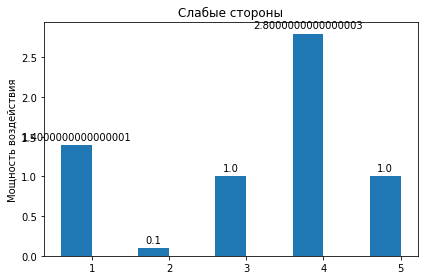

1 - задержка поставок продукции
2 - проблемы с энергией
3 - утечка продуктов
4 - низкая целевая аудитория на старте
5 - неудачное расположение


In [5]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/restik.gsheet')
table = gs.open_by_key('1xfLXwP0XdgeExdyYHMYrpFK--zujy8xTm-nyxRKIsu8')
worksheet = table.worksheet('Weaknesses')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
weaknesses_sum = sum(power)
print('Суммарная сила сильный сторон:', weaknesses_sum)
worksheet.update('F2', weaknesses_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Слабые стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 16484
-rw------- 1 root 2043997 Mar 10 18:09  70CEDE9A-4777-4EDB-A175-E5406A62911B.jpeg
-rw------- 1 root   38400 Oct 29 13:48 '72,1 (1).xls'
-rw------- 1 root   38400 Oct 29 15:29  72,1.xls
-rw------- 1 root   43008 Oct 29 13:51 '72  2019 (1).xls'
-rw------- 1 root   43008 Oct 29 13:50 '72  2019 (2).xls'
-rw------- 1 root   43008 Oct 29 15:51 '72  2019.xls'
-rw------- 1 root    7300 Jan  7  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.docx
-rw------- 1 root     151 Jan  3  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.gdoc
-rw------- 1 root 2043997 Mar 10 18:12  B1E0DA3D-1909-4F72-88FD-E8961850AF2F.jpeg
-rw------- 1 root     151 Nov 21 09:04 'barchart1 verbitsky.gdoc'
-rw------- 1 root     151 Feb 11 00:38 'bar chart dasha smirnova the best.gdoc'
-rw------- 1 root     151 Nov 20 21:31 'bar chart.gdoc'
drwx------ 2 root    4096 Nov  4  2016  Camtasia/
-rw------- 1 root    8656 

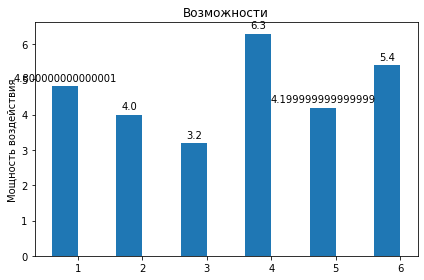

1 - минимизация величины кредита
2 - спрос на продукцию
3 - охват вегитарианцев
4 - доставка
5 - активная рекламная кампания
6 - расширение меню для более бедной аудитории


In [6]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/restik.gsheet')
table = gs.open_by_key('1xfLXwP0XdgeExdyYHMYrpFK--zujy8xTm-nyxRKIsu8')
worksheet = table.worksheet('Opportunities')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
opportunities_sum = sum(power)
print('Суммарная сила сильный сторон:', opportunities_sum)
worksheet.update('F2', opportunities_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Возможности')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 16484
-rw------- 1 root 2043997 Mar 10 18:09  70CEDE9A-4777-4EDB-A175-E5406A62911B.jpeg
-rw------- 1 root   38400 Oct 29 13:48 '72,1 (1).xls'
-rw------- 1 root   38400 Oct 29 15:29  72,1.xls
-rw------- 1 root   43008 Oct 29 13:51 '72  2019 (1).xls'
-rw------- 1 root   43008 Oct 29 13:50 '72  2019 (2).xls'
-rw------- 1 root   43008 Oct 29 15:51 '72  2019.xls'
-rw------- 1 root    7300 Jan  7  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.docx
-rw------- 1 root     151 Jan  3  2020  Anketa_Na_Regionalnyi_774_Etap_Vsosh.gdoc
-rw------- 1 root 2043997 Mar 10 18:12  B1E0DA3D-1909-4F72-88FD-E8961850AF2F.jpeg
-rw------- 1 root     151 Nov 21 09:04 'barchart1 verbitsky.gdoc'
-rw------- 1 root     151 Feb 11 00:38 'bar chart dasha smirnova the best.gdoc'
-rw------- 1 root     151 Nov 20 21:31 'bar chart.gdoc'
drwx------ 2 root    4096 Nov  4  2016  Camtasia/
-rw------- 1 root    8656 

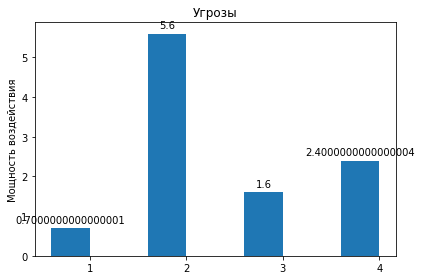

1 - наличие конкуренции
2 - поднятие цен на используемые продукты
3 - изменение вкусовых предпочтений клиентов
4 - текучка кадров


In [7]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/restik.gsheet')
table = gs.open_by_key('1xfLXwP0XdgeExdyYHMYrpFK--zujy8xTm-nyxRKIsu8')
worksheet = table.worksheet('Threats')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):                      
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
threats_sum = sum(power)
print('Суммарная сила сильный сторон:', threats_sum)
worksheet.update('F2', threats_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Угрозы')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Результат: 33.900000000000006


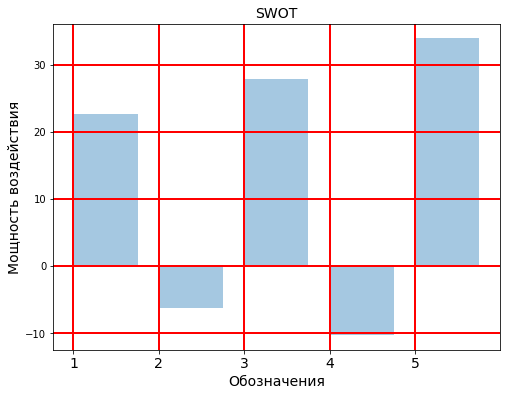

1  -  Сильные стороны
2  -  Слабые стороны
3  -  Возможности
4  -  Угорозы
5  -  Результат


In [8]:
#копирование значений силы из листов
worksheet = table.worksheet('Strengths')
strengths_power = worksheet.acell('F2').value
worksheet = table.worksheet('Weaknesses')
weaknesses_power = worksheet.acell('F2').value
worksheet = table.worksheet('Opportunities')
opportunities_power = worksheet.acell('F2').value
worksheet = table.worksheet('Threats')
threats_power = worksheet.acell('F2').value
#добавление в таблицу result
worksheet = table.worksheet('Result')
worksheet.update('A1', 'Суммарная сила сильных сторон')
worksheet.update('A2', strengths_power)
worksheet.update('B1', 'Суммарная сила слабых сторон') 
worksheet.update('B2', weaknesses_power)
worksheet.update('A4', 'Суммарная сила возможностей') 
worksheet.update('A5', opportunities_power)
worksheet.update('B4', 'Суммарная сила угроз') 
worksheet.update('B5', threats_power)
#подсчет результата анализа и добавление его в таблицу
result = float(strengths_power) - 1*float(weaknesses_power) + float(opportunities_power) - 1*float(threats_power)
print('Результат:', result)
worksheet = table.worksheet('Result')
worksheet.update('A7', 'Результат')
worksheet.update('A8', result)
#создание графика
def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
x_float = [1, 2, 3, 4, 5]
y_float = [float(strengths_power), -1*float(weaknesses_power), float(opportunities_power), -1*float(threats_power),  result]
title = [ "Сильные стороны", "Слабые стороны", "Возможности", "Угорозы", "Результат"]
x_pos=list()
i=0
for i in range(x_float.__len__()):
  x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()
#печать заголовков
for i in range(title.__len__()):
  print(i+1, " - ", title[i])
  i += 1